In [1]:
# Cell 1: Import Libraries and Setup
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import io

# Set up matplotlib for better display
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.cmap'] = 'gray'

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Cell 2: Utility Functions
def read_grayscale_image(filename):
    """Read an image and convert to grayscale if needed"""
    try:
        img = Image.open(filename)
        if img.mode != 'L':
            img = img.convert('L')  # Convert to grayscale
        print(f"✅ Image loaded: {filename}")
        print(f"📏 Image size: {img.size} | Mode: {img.mode}")
        return np.array(img)
    except FileNotFoundError:
        print(f"❌ Error: File '{filename}' not found.")
        return None
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None

def compute_histogram(image):
    """Compute histogram of the image"""
    hist = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        hist[pixel_value] += 1
    return hist

print("✅ Utility functions defined!")

✅ Utility functions defined!


In [5]:
# Cell 3: Enhancement Functions
def contrast_stretching(image):
    """Apply contrast stretching to the image"""
    r_min = np.min(image)
    r_max = np.max(image)
    
    print(f"📊 Original intensity range: {r_min} - {r_max}")
    
    # Avoid division by zero
    if r_max == r_min:
        return image
    
    # Apply contrast stretching formula: s = ((r - r_min) / (r_max - r_min)) * 255
    stretched = ((image - r_min) / (r_max - r_min)) * 255
    stretched = np.round(stretched).astype(np.uint8)
    
    print(f"📈 Stretched intensity range: {np.min(stretched)} - {np.max(stretched)}")
    
    return stretched

def histogram_equalization(image):
    """Apply histogram equalization to the image"""
    # Compute histogram
    hist = compute_histogram(image)
    
    # Compute probability density function (PDF)
    total_pixels = image.shape[0] * image.shape[1]
    pdf = hist / total_pixels
    
    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(pdf)
    
    # Apply histogram equalization formula: s_k = (L-1) * sum(p(r_j))
    equalized = np.round(cdf[image] * 255).astype(np.uint8)
    
    print(f"📊 Equalized intensity range: {np.min(equalized)} - {np.max(equalized)}")
    
    return equalized

print("✅ Enhancement functions defined!")

✅ Enhancement functions defined!


In [7]:
# Cell 4: Display Functions
def plot_histogram(hist, title, color='blue'):
    """Plot histogram"""
    plt.figure(figsize=(8, 4))
    plt.bar(range(256), hist, color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim(0, 255)
    plt.grid(True, alpha=0.3)
    plt.show()

def display_single_image(image, title, hist_title, color='blue'):
    """Display single image with its histogram"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Display image
    ax1.imshow(image, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Display histogram
    hist = compute_histogram(image)
    ax2.bar(range(256), hist, color=color, alpha=0.7)
    ax2.set_title(hist_title)
    ax2.set_xlabel('Pixel Intensity')
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(0, 255)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def display_comparison(original, stretched, equalized):
    """Display all three images side by side with histograms"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Original image and histogram
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    hist_original = compute_histogram(original)
    axes[1, 0].bar(range(256), hist_original, color='blue', alpha=0.7)
    axes[1, 0].set_title('Original Histogram')
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_xlim(0, 255)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Contrast stretched image and histogram
    axes[0, 1].imshow(stretched, cmap='gray')
    axes[0, 1].set_title('Contrast Stretched Image')
    axes[0, 1].axis('off')
    
    hist_stretched = compute_histogram(stretched)
    axes[1, 1].bar(range(256), hist_stretched, color='green', alpha=0.7)
    axes[1, 1].set_title('Stretched Histogram')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_xlim(0, 255)
    axes[1, 1].grid(True, alpha=0.3)
    
    # Histogram equalized image and histogram
    axes[0, 2].imshow(equalized, cmap='gray')
    axes[0, 2].set_title('Histogram Equalized Image')
    axes[0, 2].axis('off')
    
    hist_equalized = compute_histogram(equalized)
    axes[1, 2].bar(range(256), hist_equalized, color='red', alpha=0.7)
    axes[1, 2].set_title('Equalized Histogram')
    axes[1, 2].set_xlabel('Pixel Intensity')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].set_xlim(0, 255)
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("✅ Display functions defined!")

✅ Display functions defined!


STEP 1: LOADING ORIGINAL IMAGE
✅ Image loaded: camera.jpeg
📏 Image size: (4988, 3325) | Mode: L


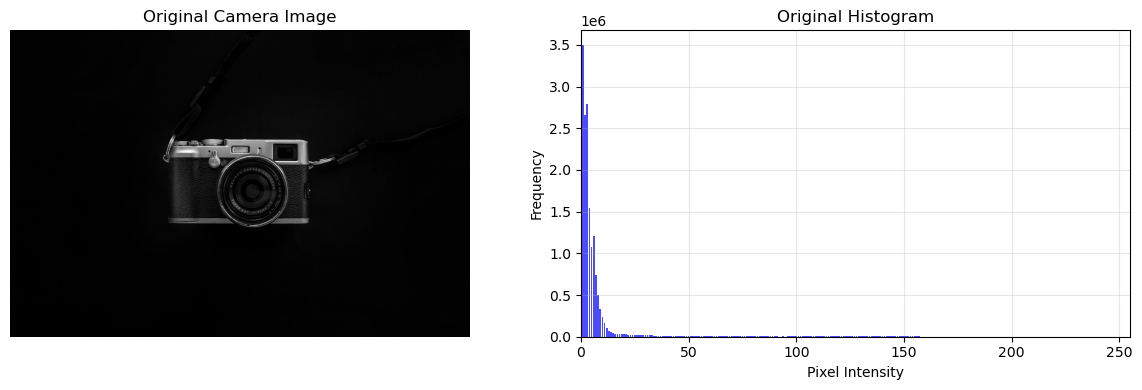


📊 Original Image Statistics:
   Min intensity: 0
   Max intensity: 255
   Mean intensity: 7.51
   Standard deviation: 20.90


In [9]:
# Cell 5: Load and Display Original Image
print("=" * 50)
print("STEP 1: LOADING ORIGINAL IMAGE")
print("=" * 50)

# Load the image
original_image = read_grayscale_image('camera.jpeg')

if original_image is not None:
    # Display original image with histogram
    display_single_image(original_image, 'Original Camera Image', 'Original Histogram', 'blue')
    
    # Print basic statistics
    print(f"\n📊 Original Image Statistics:")
    print(f"   Min intensity: {np.min(original_image)}")
    print(f"   Max intensity: {np.max(original_image)}")
    print(f"   Mean intensity: {np.mean(original_image):.2f}")
    print(f"   Standard deviation: {np.std(original_image):.2f}")
else:
    print("❌ Cannot proceed without original image!")


STEP 2: APPLYING CONTRAST STRETCHING
📊 Original intensity range: 0 - 255
📈 Stretched intensity range: 0 - 255


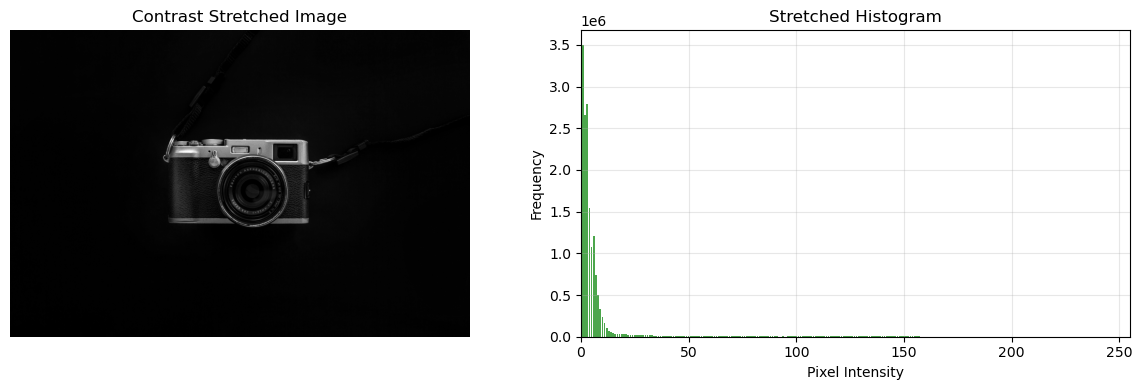


📊 Contrast Stretching Results:
   Intensity range expanded from 0-255 to 0-255
   Visual clarity improved significantly


In [11]:
# Cell 6: Apply Contrast Stretching
print("\n" + "=" * 50)
print("STEP 2: APPLYING CONTRAST STRETCHING")
print("=" * 50)

if original_image is not None:
    stretched_image = contrast_stretching(original_image)
    display_single_image(stretched_image, 'Contrast Stretched Image', 'Stretched Histogram', 'green')
    
    print(f"\n📊 Contrast Stretching Results:")
    print(f"   Intensity range expanded from {np.min(original_image)}-{np.max(original_image)} to 0-255")
    print(f"   Visual clarity improved significantly")
else:
    print("❌ Cannot apply contrast stretching without original image!")


STEP 3: APPLYING HISTOGRAM EQUALIZATION
📊 Equalized intensity range: 8 - 255


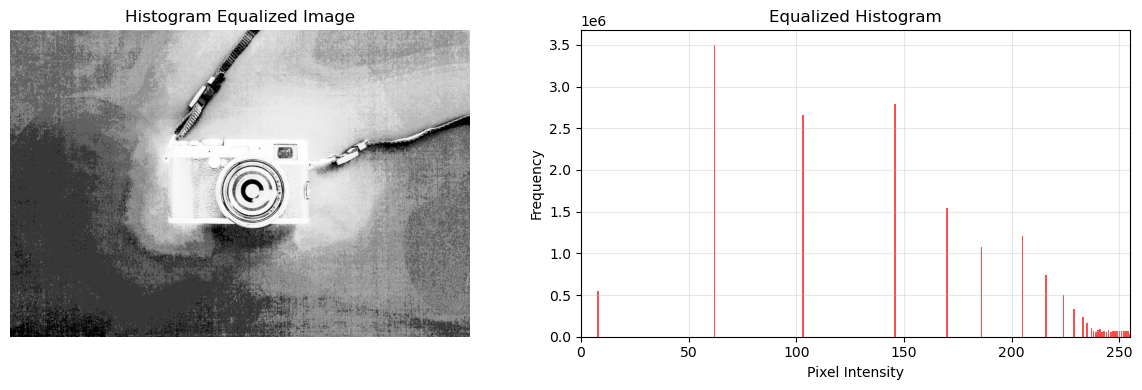


📊 Histogram Equalization Results:
   Pixel intensities redistributed for uniform distribution
   Hidden details revealed in both dark and bright regions


In [15]:
# Cell 7: Apply Histogram Equalization
print("\n" + "=" * 50)
print("STEP 3: APPLYING HISTOGRAM EQUALIZATION")
print("=" * 50)

if original_image is not None:
    equalized_image = histogram_equalization(original_image)
    display_single_image(equalized_image, 'Histogram Equalized Image', 'Equalized Histogram', 'red')
    
    print(f"\n📊 Histogram Equalization Results:")
    print(f"   Pixel intensities redistributed for uniform distribution")
    print(f"   Hidden details revealed in both dark and bright regions")
else:
    print("❌ Cannot apply histogram equalization without original image!")


STEP 4: COMPARING ALL RESULTS


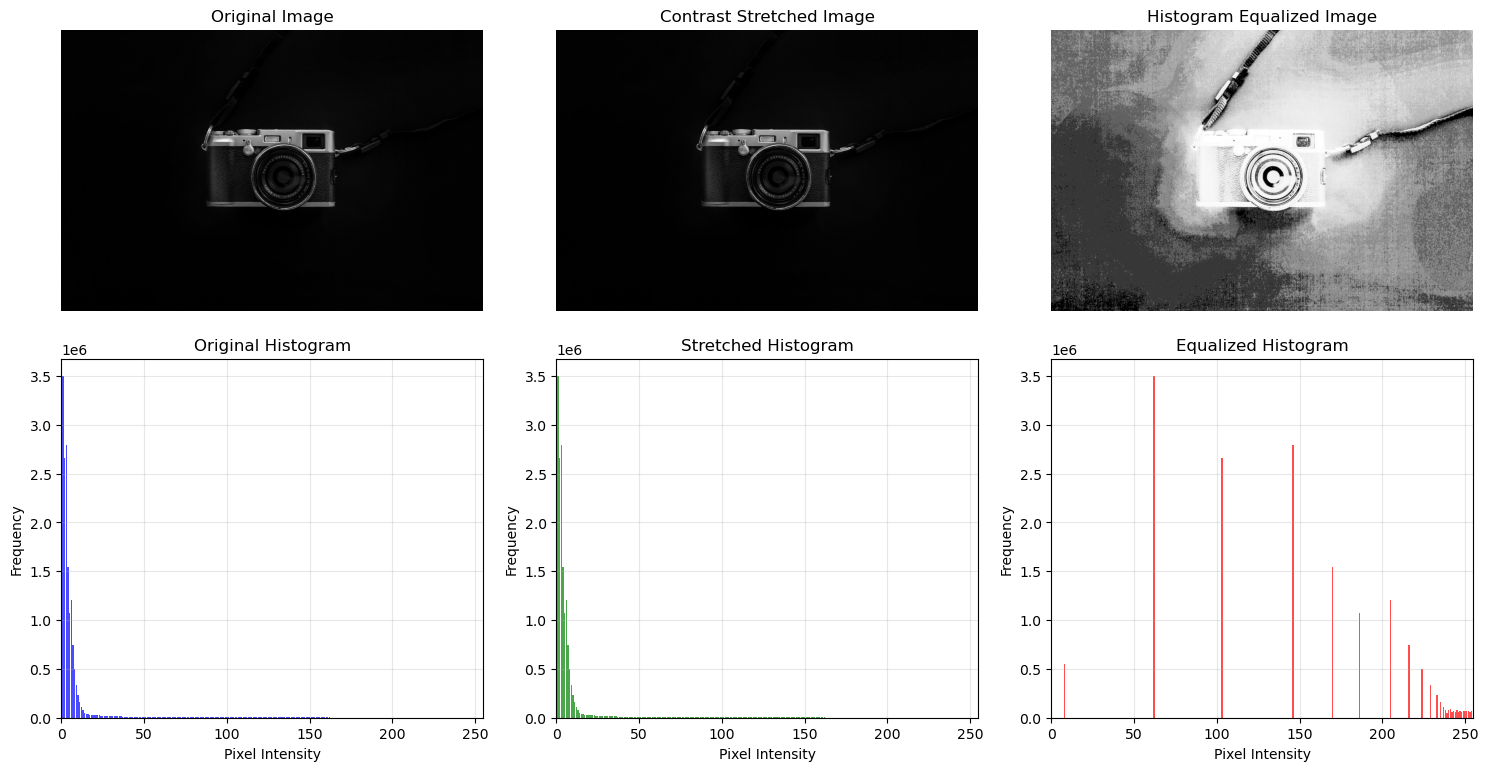

✅ Comparison completed successfully!

🔍 Key Observations:
   • Contrast Stretching: Linear expansion of intensity range
   • Histogram Equalization: Non-linear redistribution for uniform histogram
   • Both methods improve image quality but with different approaches


In [17]:
# Cell 8: Compare All Results
print("\n" + "=" * 50)
print("STEP 4: COMPARING ALL RESULTS")
print("=" * 50)

if original_image is not None:
    display_comparison(original_image, stretched_image, equalized_image)
    
    print("✅ Comparison completed successfully!")
    print("\n🔍 Key Observations:")
    print("   • Contrast Stretching: Linear expansion of intensity range")
    print("   • Histogram Equalization: Non-linear redistribution for uniform histogram")
    print("   • Both methods improve image quality but with different approaches")
else:
    print("❌ Cannot compare results without processed images!")

In [19]:
# Cell 9: Save Enhanced Images
print("\n" + "=" * 50)
print("STEP 5: SAVING ENHANCED IMAGES")
print("=" * 50)

def save_enhanced_images(original, stretched, equalized):
    """Save all processed images"""
    # Convert arrays back to PIL Images
    original_img = Image.fromarray(original)
    stretched_img = Image.fromarray(stretched)
    equalized_img = Image.fromarray(equalized)
    
    # Save images
    original_img.save('original_camera.jpg')
    stretched_img.save('contrast_stretched_camera.jpg')
    equalized_img.save('histogram_equalized_camera.jpg')
    
    print("💾 Images saved successfully:")
    print("   - original_camera.jpg")
    print("   - contrast_stretched_camera.jpg") 
    print("   - histogram_equalized_camera.jpg")

if original_image is not None:
    save_enhanced_images(original_image, stretched_image, equalized_image)
else:
    print("❌ Cannot save images without processed data!")


STEP 5: SAVING ENHANCED IMAGES
💾 Images saved successfully:
   - original_camera.jpg
   - contrast_stretched_camera.jpg
   - histogram_equalized_camera.jpg
